# SysML v2 Sample Model

This model was build from a SysML training demo to learn how to develop the various diagrams. The video can be found here:

https://youtu.be/vj5BOy5G8ho

In [43]:
package 'Package Example' {
    import ISQ::*;
    import ScalarValues::*;
    // import Definitions::*; 
    // import AttributeDefinitions::*;
    
    part def Automobile;
    
    alias Car for Automobile;
    alias Torque for ISQ::TorqueValue;
}

Package Package Example (45c7a64e-e01f-4719-bc30-1959fb0fe44b)


In [44]:
part def Engine;
part def Person;
part def Speedometer;
abstract part def Software;
part def CruiseController:>Software;  // :>Software is a classifier

part def Vehicle {
    attribute mass : ScalarValues::Real;
    
    part speedometer : Speedometer {
        event occurrence sensedSpeedSent;
    }
    
    part engine : Engine {
    event occurrence fuelCommandReceived;
    }
    
    part cruiseController : CruiseController {
        event occurrence setSpeedReceived;
        then event occurrence sensedSpeedReceived;
        then event occurrence fuelCommandSent;
    }
    
    ref part driver : Person;
}

attribute def VehicleStatus {
    import ScalarValues::*;
    
    attribute gearSetting : Integer;
    attribute acceleratorPosition : Real;
}


PartDefinition Engine (be0612f9-8cee-420b-8798-790077607157)
PartDefinition Person (040bd9d5-6fe8-4078-a75f-4f2f4bc7c39e)
PartDefinition Speedometer (705c4ecb-c74f-4196-8fd9-1f1b1e5431fb)
PartDefinition Software (eebf3cc8-2b1e-4ac6-b896-cebba7842e4d)
PartDefinition CruiseController (57bb02f6-f674-4784-aa42-e166ccc9525c)
PartDefinition Vehicle (b2e2e8a4-254e-4a65-930d-e1975b9d51cc)
AttributeDefinition VehicleStatus (77125120-33c4-497f-b4f2-d7a3c2722e6e)


In [45]:
// Define PartUsage
part driver : Person {
    event occurrence setSpeedSent;
}

part vehicle : Vehicle;

PartUsage driver (8b59bd96-8fbd-4147-b110-8cad558af3f8)
PartUsage vehicle (e3d9d117-98a1-41c6-8ea5-48e86894c380)


In [46]:
// Revisit these from the VehicleModel

attribute def SetSpeed;
attribute def SensedSpeed;
attribute def FuelCommand;

AttributeDefinition SetSpeed (734da9f9-bb7d-4226-99f3-963bbcda57c4)
AttributeDefinition SensedSpeed (1df86373-e2bc-40a4-a71e-78c71875a479)
AttributeDefinition FuelCommand (2b2ca086-44cc-4392-9013-404218ce02b7)


In [47]:
occurrence def CruiseControlInteraction {
//    ref part :>> driver;
//    ref part :>> vehicle;
    
    message setSpeedMessage of SetSpeed
        from driver.setSpeedSent
        to vehicle.cruiseController.setSpeedReceived;
    
    message sensedSpeedMessage of SensedSpeed
        from vehicle.speedometer.sensedSpeedSent
        to vehicle.cruiseController.sensedSpeedReceived;
    
    message fuelCommandMessage of FuelCommand
        from vehicle.cruiseController.fuelCommandSent
        to vehicle.engine.fuelCommandReceived;
    
//    first setSpeedMessage then sensedSpeedMessage;
// The line above created duplicate signals
}

OccurrenceDefinition CruiseControlInteraction (b8eccf36-72d0-484f-a47d-b1e0b65e65bd)


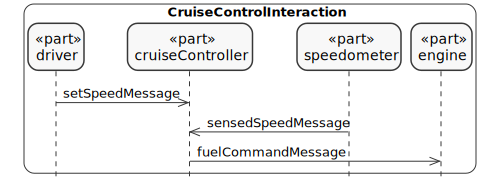

In [48]:
%viz CruiseControlInteraction

In [49]:
// occurrence def CruiseControlInteraction {
//     ref part driver : Person {
//         event setSpeedMessage::source;
//     }
    
//     ref part vehicle : Vehicle;
    
// //     ref part vehicle : Vehicle {
// //         part cruiseController : CruiseController {
// //             event setSpeedMessage::target;
// //             then event sensedSpeedMessage::target;
// //             then event fuelCommandMessage::source;
// //         }
// //         part speedometer : Speedometer {
// //             event sensedSpeedMessage::source;
// //         }
// //         part engine : Engine {
// //             event fuelCommandMessage::target;
// //         }
// //     }
    
//     message setSpeedMessage of SetSpeed;
//     then message sensedSpeedMessage of SensedSpeed;
//     message fuelCommandMessage of FuelCommand;
// }

In [50]:
// %viz CruiseControlInteraction

In [51]:
package 'EventOccurrenceExample' {	
	part def Driver;
	part def CruiseController;
	part def Speedometer;
	part def Engine;
	part def Vehicle;
	
	part driver : Driver {
		event occurrence setSpeedSent;
	}
	
	part vehicle : Vehicle {
	
		part cruiseController : CruiseController {
			event occurrence setSpeedReceived;		
			then event occurrence sensedSpeedReceived;		
			then event occurrence fuelCommandSent;
		}
		
		part speedometer : Speedometer {
			event occurrence sensedSpeedSent;
		}
		
		part engine : Engine {
			event occurrence fuelCommandReceived;
		}
	
	}
}

Package EventOccurrenceExample (18332ba0-aef5-4698-adbc-c971018400d3)


In [52]:
package 'InteractionExample_1' {
	import 'EventOccurrenceExample'::*;
	
	attribute def SetSpeed;
	attribute def SensedSpeed;
	attribute def FuelCommand;
	
	occurrence def CruiseControlInteraction {		
		ref part :>> driver;		
		ref part :>> vehicle;
		
		message setSpeedMessage of SetSpeed 
			from driver.setSpeedSent to vehicle.cruiseController.setSpeedReceived;
			
		message sensedSpeedMessage of SensedSpeed 
			from vehicle.speedometer.sensedSpeedSent to vehicle.cruiseController.sensedSpeedReceived;
			
		message fuelCommandMessage of FuelCommand 
			from vehicle.cruiseController.fuelCommandSent to vehicle.engine.fuelCommandReceived;
		
		first setSpeedMessage then sensedSpeedMessage;
	}
}

Package InteractionExample_1 (9d95619d-3b56-47ee-bd57-9947aca301fa)


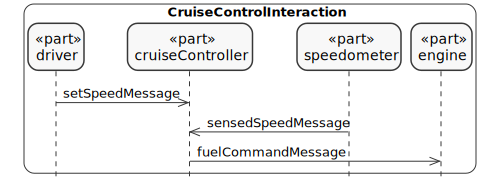

In [53]:
%viz CruiseControlInteraction

In [54]:
package 'InteractionRealization_1' {
	import 'InteractionExample_1'::*;
	
	part driver_a : Driver {
		perform action driverBehavior {
			action sendSetSpeed send SetSpeed() to vehicle_a;
		}
	}
	
	part vehicle_a : Vehicle {
		part cruiseController_a : CruiseController {
			perform action controllerBehavior {
				action receiveSetSpeed accept SetSpeed via vehicle_a;
				then action receiveSensedSpeed accept SensedSpeed via cruiseController_a;
				then action sendFuelCommand send FuelCommand() to engine_a;
			}
		}
		
		part speedometer_a : Speedometer {
			perform action speedometerBehavior {
				action sendSensedSpeed send SensedSpeed() to cruiseController_a;
			}
		}
		
		part engine_a : Engine {
			perform action engineBehavior {
				action receiveFuelCommand accept FuelCommand via engine_a;
			}
		}
	}
	
	occurrence cruiseControlInteraction_a : CruiseControlInteraction {
		part :>> driver :>> driver_a {
			event driverBehavior.sendSetSpeed[1] :>> setSpeedSent;
		}
		
		part :>> vehicle :>> vehicle_a {
			part :>> cruiseController :>> cruiseController_a {
				event controllerBehavior.receiveSetSpeed[1] :>> setSpeedReceived;
				event controllerBehavior.receiveSensedSpeed[1] :>> sensedSpeedReceived;
				event controllerBehavior.sendFuelCommand[1] :>> fuelCommandSent;
			}
			part :>> speedometer :>> speedometer_a {
				event speedometerBehavior.sendSensedSpeed[1] :>> sensedSpeedSent;
			}
			part :>> engine :>> engine_a {
				event engineBehavior.receiveFuelCommand[1] :>> fuelCommandReceived;
			}
		}
		
		message :> driver_a.driverBehavior.sendSetSpeed.outgoingTransfer :>> setSpeedMessage;
		message :> vehicle_a.speedometer_a.speedometerBehavior.sendSensedSpeed.outgoingTransfer :>> sensedSpeedMessage;
		message :> vehicle_a.cruiseController_a.controllerBehavior.sendFuelCommand.outgoingTransfer :>> fuelCommandMessage;
	}
}

Package InteractionRealization_1 (b11b55ae-c781-453d-891b-7f11e9a2a7c4)


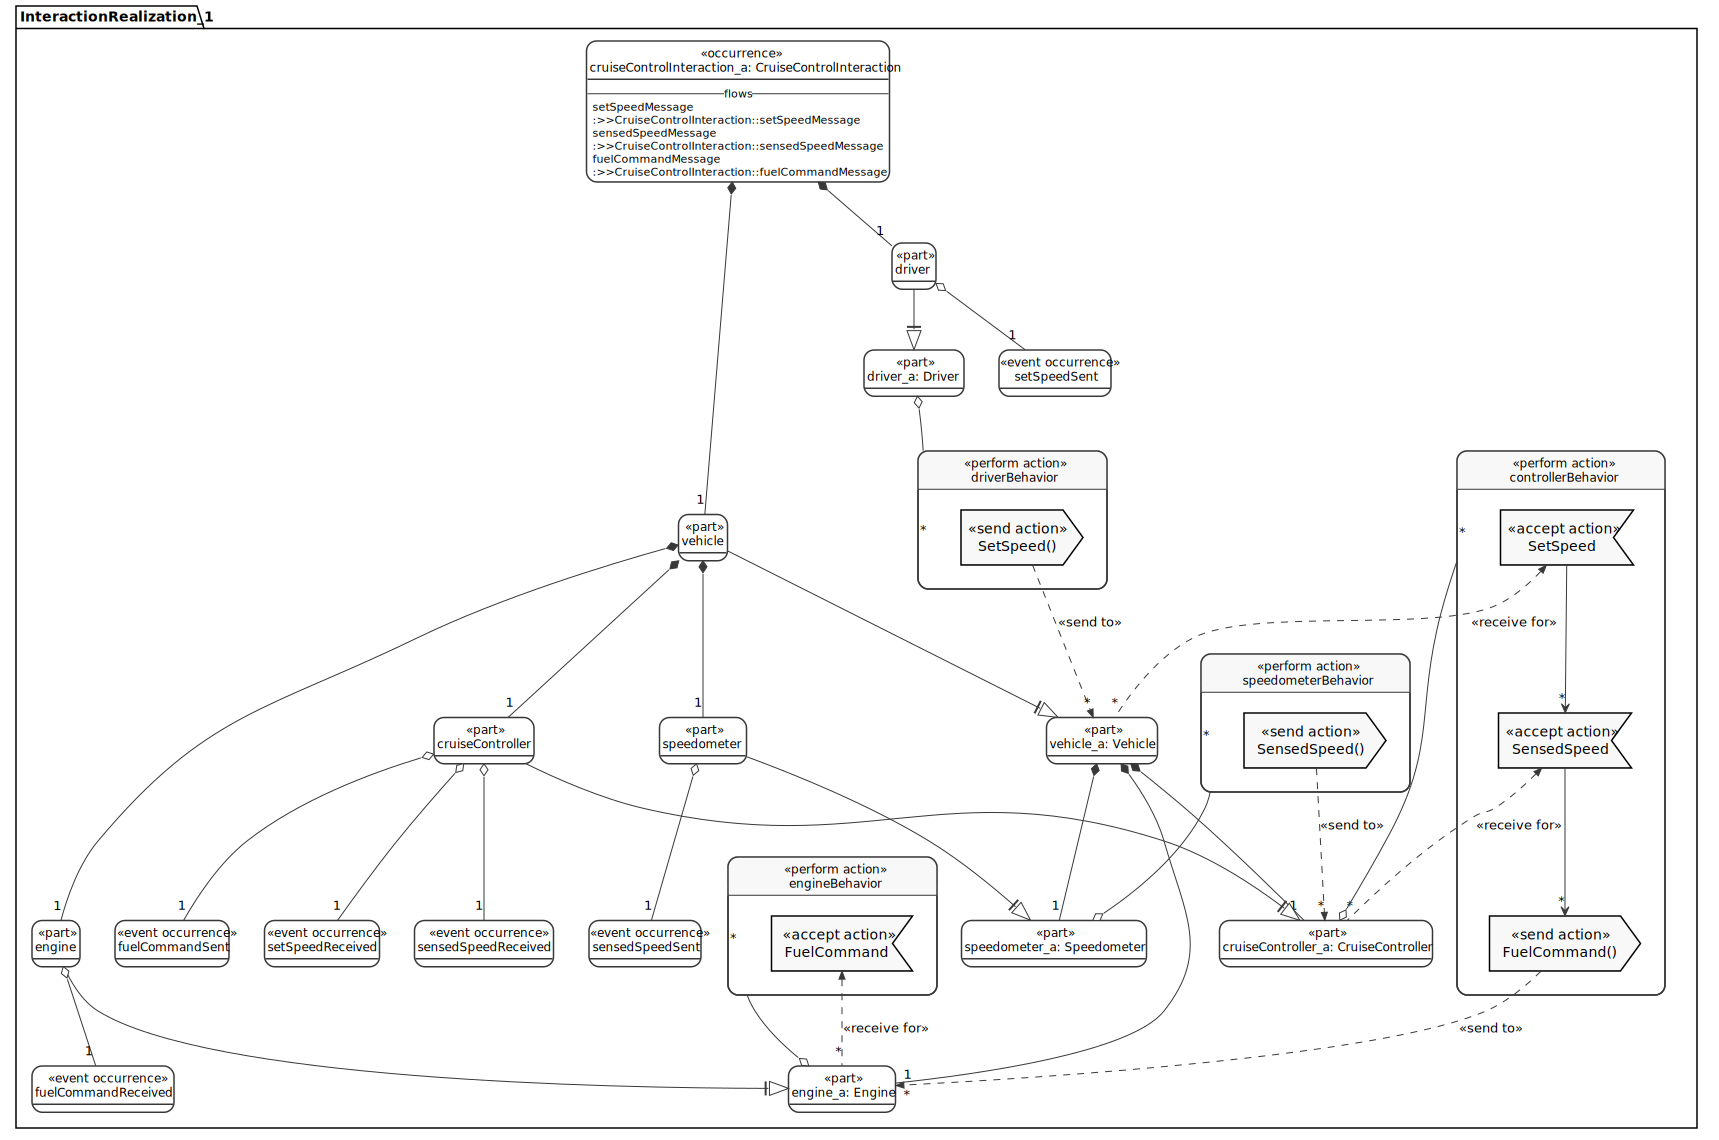

In [56]:
%viz InteractionRealization_1